In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-healthcare-dataset/Diabetes-Data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-healthcare-dataset/Diabetes-Data.csv")


In [4]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(2768, 10)

In [6]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
df.columns.tolist()


['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.isnull().sum(axis=0)

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df=df.drop(columns=["Id"])


In [11]:
df.duplicated().sum()


1990

In [12]:
df.nunique()


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64

In [13]:
df['Outcome'].unique()


array([1, 0])

In [14]:
df['Outcome'].value_counts()


Outcome
0    1816
1     952
Name: count, dtype: int64

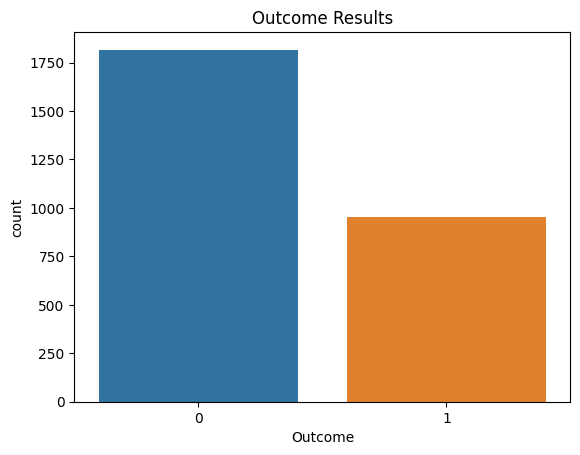

In [15]:
sns.countplot(x=df['Outcome'])
plt.title('Outcome Results');


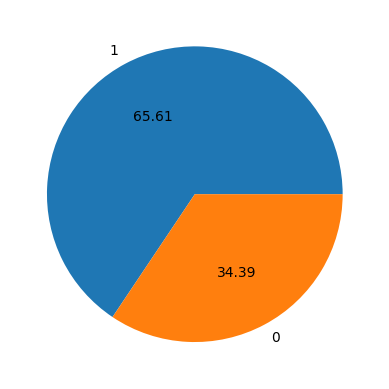

In [16]:
plt.pie(df.groupby(by=["Outcome"]).size(), labels = df["Outcome"].unique(), autopct = "%0.2f")
plt.show()

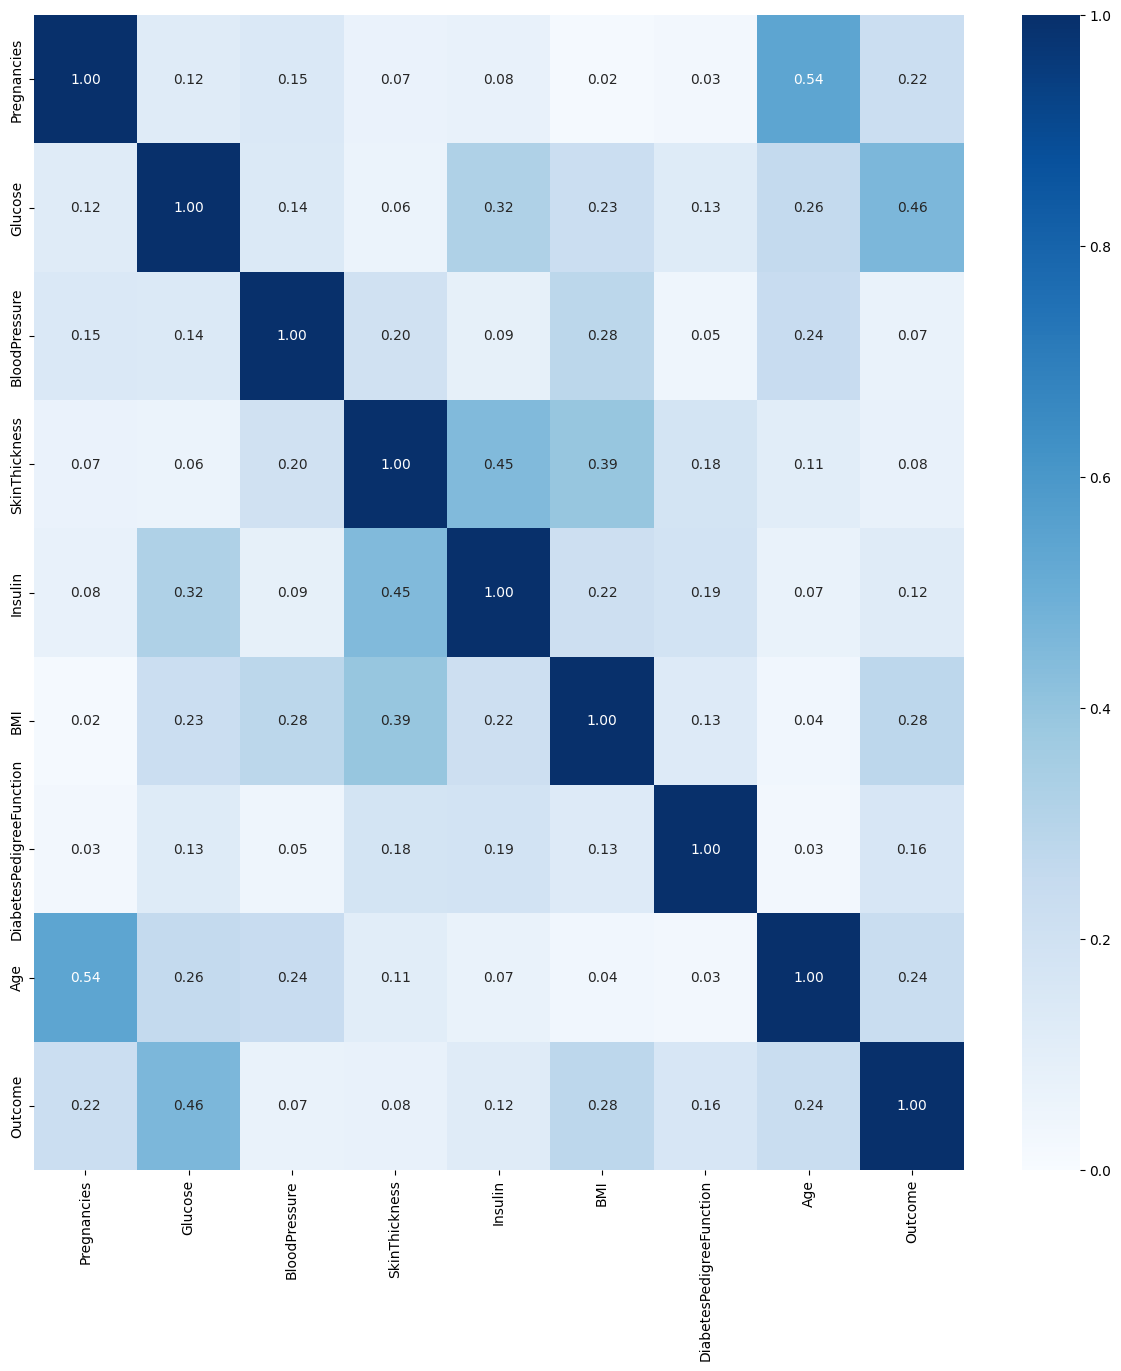

In [17]:
corr=abs(df.corr())
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Blues', fmt='.2f')
plt.show()

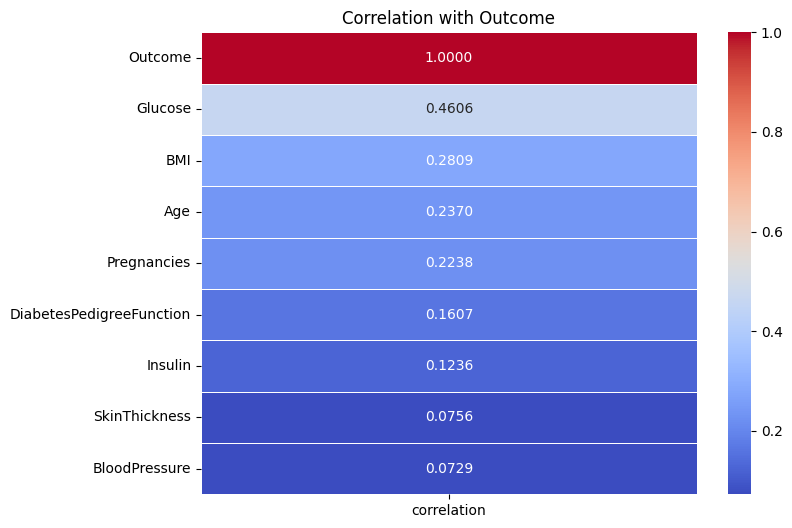

In [18]:
corr = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

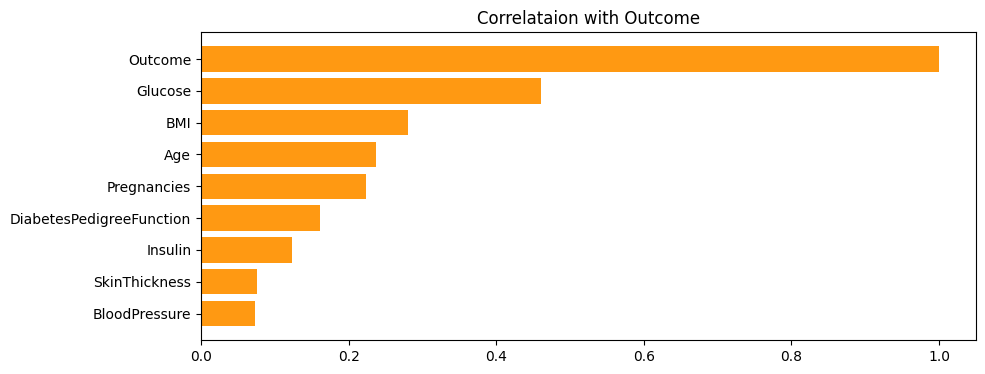

In [19]:
corr = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(df.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'],color="#FF9912")
plt.title('Correlataion with Outcome')
plt.show()

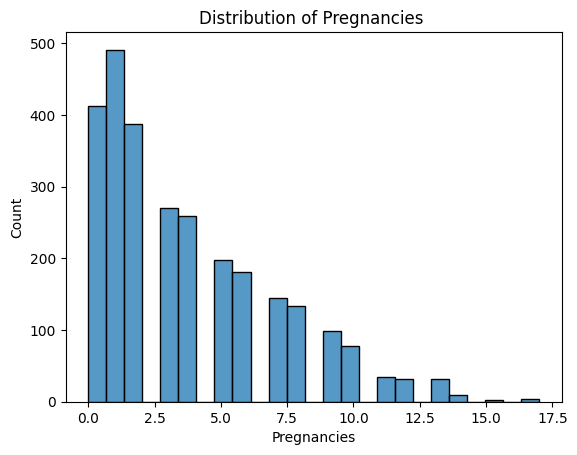

In [20]:
sns.histplot(x=df.Pregnancies,bins=25)
plt.title('Distribution of Pregnancies ')
plt.show()

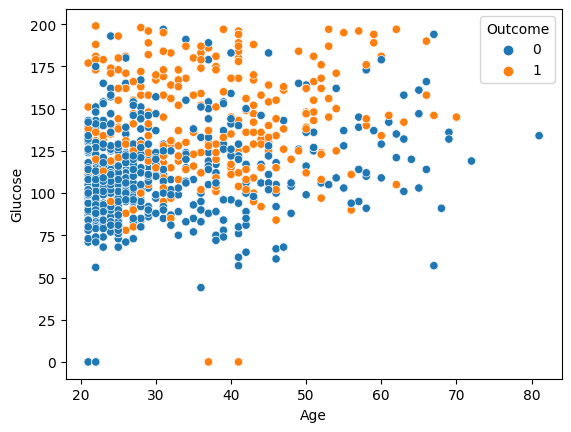

In [21]:
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.show()

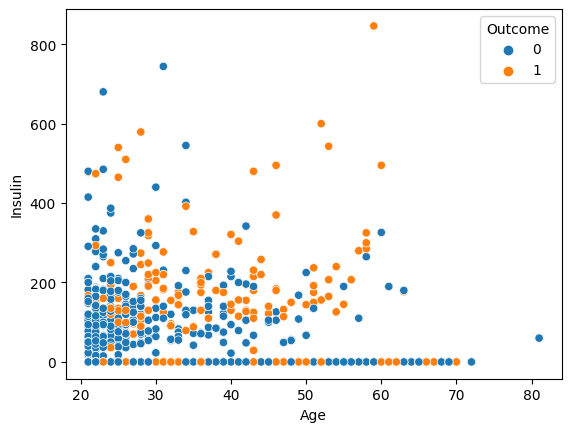

In [22]:
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data=df)
plt.show()

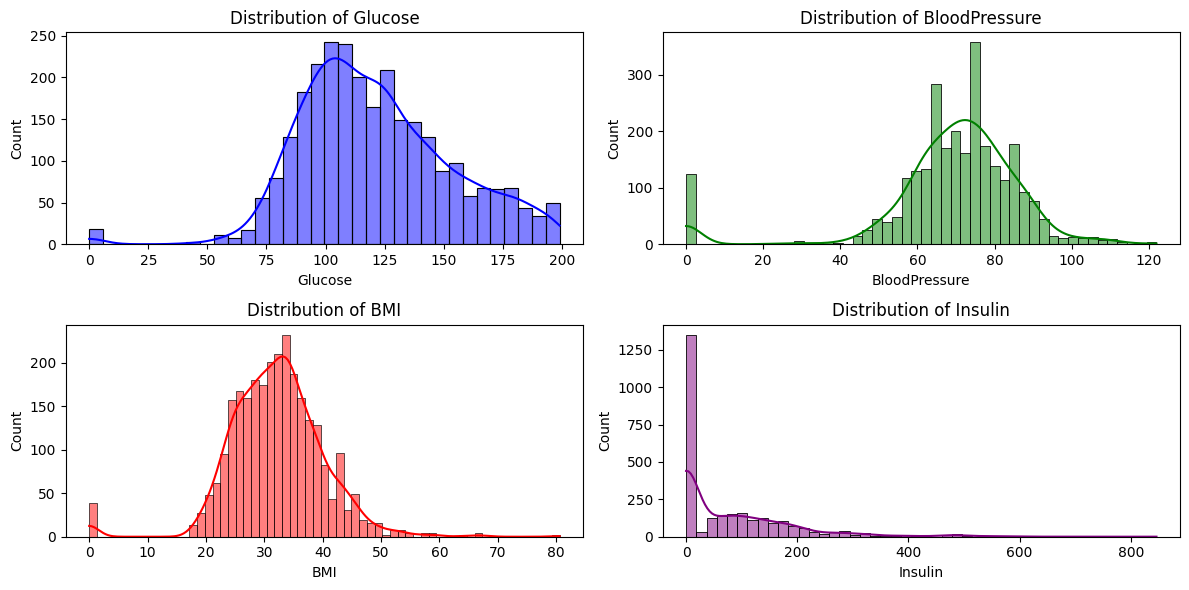

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')

plt.tight_layout()
plt.show()

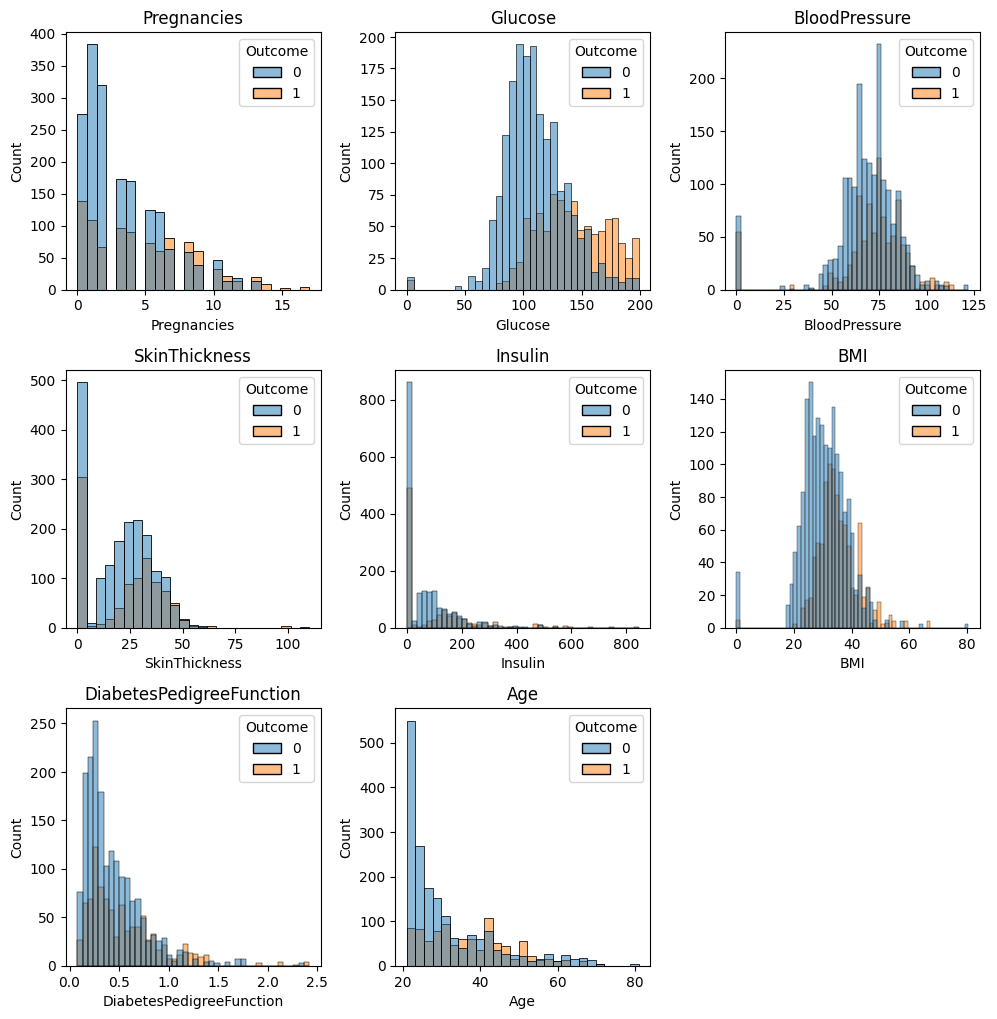

In [24]:
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='Outcome')

plt.tight_layout()

In [25]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=17)


In [27]:
DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=20)

In [28]:
DT_model.score(X_test , y_test)


0.9915764139590855

In [29]:
DT_pred=DT_model.predict(X_test)
DT_acc = accuracy_score(y_test ,DT_pred )

In [30]:
print(classification_report(y_test , DT_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      1.00      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(95.72222222222221, 0.5, 'Truh')

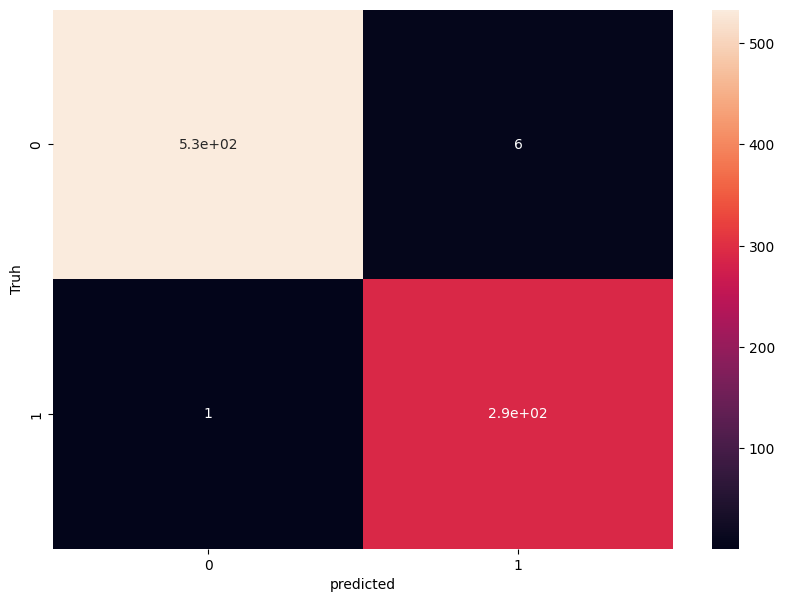

In [31]:
cm2 = confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [32]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [33]:
svc.score(X_train , y_train)



0.774909654104285

In [34]:
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)

In [35]:
print(classification_report(y_test , svc_pred))


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       539
           1       0.72      0.51      0.60       292

    accuracy                           0.76       831
   macro avg       0.75      0.70      0.71       831
weighted avg       0.75      0.76      0.75       831



Text(95.72222222222221, 0.5, 'Truh')

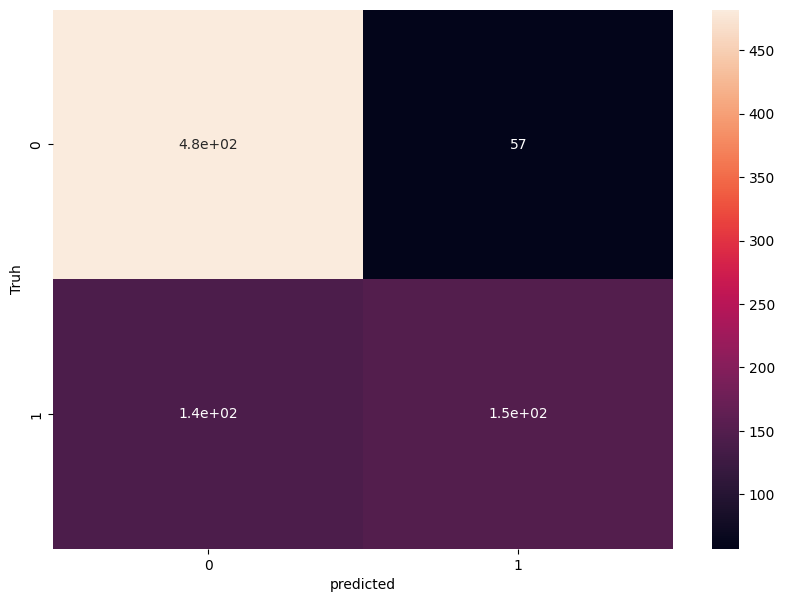

In [36]:
cm2 = confusion_matrix(y_test,svc_pred)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [37]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [38]:
RF_model.score(X_train , y_train)


1.0

In [39]:
RF_pred = RF_model.predict(X_test)


In [41]:
RF_acc=accuracy_score(y_test , RF_pred)
RF_acc

0.9903730445246691

In [42]:
print(classification_report(y_test , RF_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.98      0.99      0.99       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(95.72222222222221, 0.5, 'Truh')

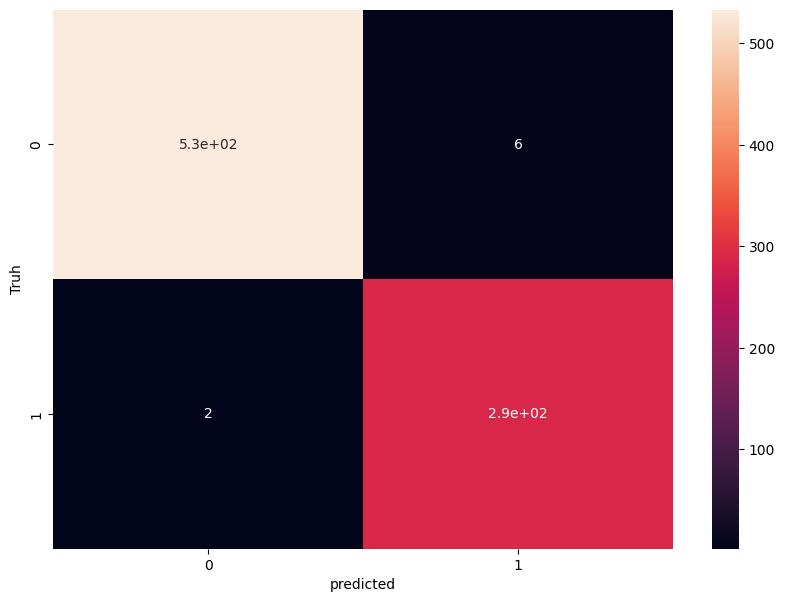

In [43]:
cm3 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

In [44]:
models=pd.DataFrame({
    'models':['Decsion_Tree','SVC','Random_forest'],
    'scores':[DT_acc,svc_acc,RF_acc]})
models.sort_values(by='scores',ascending=True)

,models,scores
1,SVC,0.759326
2,Random_forest,0.990373
0,Decsion_Tree,0.991576
